## Lecture 1 - Spatial and Environmental Data: Introduction and Local Correlations


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sympy as sym

### 2. Introduction

#### Standard Normal Distribution


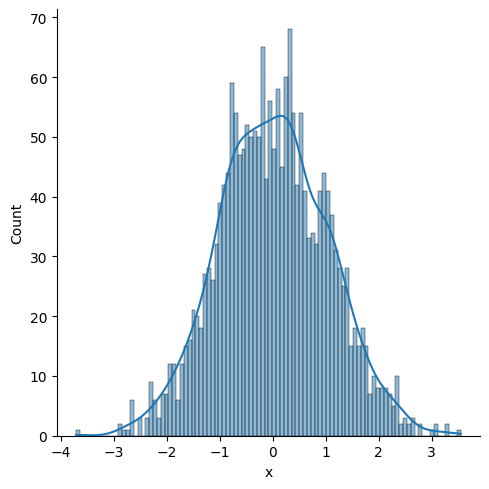

Maximum Value of the PDF: sqrt(2)/(2*sqrt(pi))


In [30]:
# Get a standard normal distribution with mean 0 and standard deviation 1
x_normal = np.random.normal(0, 1, 2000)

# Create a dataframe with the data
df = pd.DataFrame(x_normal, columns=['x'])

# Plot the data
sns.displot(df, x='x', kde=True, bins=100)
plt.show()

# Create the equation for the normal distribution
mu, sigma, x = sym.symbols('mu sigma x')
normal_pdf = (1 / (sigma * sym.sqrt(2 * sym.pi))) * \
    sym.exp((-1 / 2) * ((x - mu) / sigma) ** 2)

# We know that the PDF is greatest at mu, and since a standard normal distribution
# has mean 0 and standard deviation 1, we can set mu = 0, sigma = 1 and x = 0 to
# get the maximum value of the PDF
normal_pdf = normal_pdf.subs({mu: 0, sigma: 1, x: 0})
print("Maximum Value of the PDF:", normal_pdf.simplify())


### 4. Spatial Correlation

#### Properties of Covariance


In [31]:
# Cov(X, Y) = 0.5
# Cov(X, X) = 1
# Cov(Y, Y) = 2

# New random variable: Z = 2X + Y
# Cov(Z, Z) = Cov(2X + Y, 2X + Y)
#           = Cov(2X, 2X) + Cov(2X, Y) + Cov(Y, 2X) + Cov(Y, Y)
#           = 4 * Cov(X, X) + 2 * Cov(X, Y) + 2 * Cov(X, Y) + Cov(Y, Y)
#           = 4 (1) + 2 (0.5) + 2 (0.5) + 2
#           = 4 + 1 + 1 + 2 = 8
print("Cov(Z, Z) =", 4 * 1 + 2 * 0.5 + 2 * 0.5 + 2)

Cov(Z, Z) = 8.0


#### Properties of Random Variables 1


In [41]:
# If X and Y are independent random variables, and both are defined
# on the same sample space (z), then E(XY) = E(X)E(Y)
def E_xy(Px, Py, z):
    Px = np.array(Px)
    Py = np.array(Py)
    return sum(Px * z) * sum(Py * z)


# X and Y are two unbiased independent six-sided dice
z = [1, 2, 3, 4, 5, 6]
Px = [1/6] * len(z)
Py = [1/6] * len(z)
print("E(XY) =", E_xy(Px, Py, z))

E(XY) = 12.25
E(X2 | X1 = odd) = 3.5
E(X2 | X1 = even) = 3.0
E(X1 * X2) = 0.9722222222222222


#### Properties of Random Variables 2

Assume that you are given two unbiased six sided dice modeled as random variables X1 and X2 respectively. However, die 2 depends on the output of die 1. If the output of die 1 is even, then die 2 can only output odd numbers. Note that there is no condition if die 1 is odd. What is E(X1 \* X2)?


In [90]:
# Translating the problem statement into actual variables
z = np.array([1, 2, 3, 4, 5, 6])
Px1 = [1/6] * len(z)
Px2_even = [1/3, 0, 1/3, 0, 1/3, 0]
Px2_odd = [1/6] * len(z)

# Convert the lists into numpy arrays
Px1 = np.array(Px1)
Px2_even = np.array(Px2_even)
Px2_odd = np.array(Px2_odd)

# E(X1 X2) = (E(X1 X2 | X1 = even) + E(X1 X2 | X1 = odd)) / 2
#          = (E(X | X1 = even) * E(X2 | X1 = even) + E(X1 | X1 = odd) * E(X2)) / 2

# E(X1 | X1 = even)
Px1_even = [0, 1/3, 0, 1/3, 0, 1/3]
E_x1_given_x1_even = sum(Px1_even * z)
print("E(X1 | X1 = even) =", E_x1_given_x1_even)

# E(X2 | X1 = even)
E_x2_given_x1_even = sum(Px2_even * z)
print("E(X2 | X1 = even) =", E_x2_given_x1_even)

# E(X1 | X1 = odd)
Px1_odd = [1/3, 0, 1/3, 0, 1/3, 0]
E_x1_given_x1_odd = sum(Px1_odd * z)
print("E(X1 | X1 = odd) =", E_x1_given_x1_odd)

# E(X2)
E_x2_given_x1_odd = sum(Px2_odd * z)
print("E(X2 | X1 = odd) =", E_x2_given_x1_odd)

# E(X1 X2)
E_x1_x2 = (
    (1/2 * E_x1_given_x1_even * E_x2_given_x1_even) +
    (1/2 * E_x1_given_x1_odd * E_x2_given_x1_odd)
)
print("E(X1 X2) =", E_x1_x2)

E(X1 | X1 = even) = 4.0
E(X2 | X1 = even) = 3.0
E(X1 | X1 = odd) = 3.0
E(X2 | X1 = odd) = 3.5
E(X1 X2) = 11.25


#### Properties of Random Variables 3


In [44]:
X = np.random.uniform(-1, 1, 1000)
Y = X**2

# Calculate the covariance between X and Y
cov_xy = np.cov(X, Y)[0][1]

# Calculate the variance of X and Y
var_x = np.var(X)
var_y = np.var(Y)

# Calculate the correlation between X and Y
corr_xy = cov_xy / np.sqrt(var_x * var_y)
print("Correlation between X and Y:", corr_xy)


Correlation between X and Y: 0.014167835719228937


#### Properties of Random Variables 4


In [59]:
# Joint distribution of X and Y
# P(X = x, Y = y) | y = -1 | y = 0 | y = 1
#           x = 0 |    0   |  1/3  |   0
#           x = 1 |   1/3  |   0   |  1/3
def P(x, y):
    if x == 0 and y == -1:
        return 0
    elif x == 0 and y == 0:
        return 1/3
    elif x == 0 and y == 1:
        return 0
    elif x == 1 and y == -1:
        return 1/3
    elif x == 1 and y == 0:
        return 0
    elif x == 1 and y == 1:
        return 1/3
    else:
        return 0


# Arrays for the possible values of X and Y
x_range = np.array([0, 1])
y_range = np.array([-1, 0, 1])

# Compute the expected value of XY
E_xy = 0
for x in x_range:
    for y in y_range:
        E_xy += x * y * P(x, y)

print("E(XY) =", E_xy)

# Compute the expected value of X
E_x = 0
for x in x_range:
    for y in y_range:
        E_x += x * P(x, y)

print("E(X) =", E_x)

# Compute the expected value of Y
E_y = 0
for x in x_range:
    for y in y_range:
        E_y += y * P(x, y)

print("E(Y) =", E_y)

# Compute the covariance between X and Y
cov_xy = E_xy - E_x * E_y
print("Cov(X, Y) =", cov_xy)

# Compute the variance of X
var_x = 0
for x in x_range:
    for y in y_range:
        var_x += x**2 * P(x, y)
var_x -= E_x**2

# Compute the variance of Y
var_y = 0
for x in x_range:
    for y in y_range:
        var_y += y**2 * P(x, y)
var_y -= E_y**2

# Compute the standard deviation of X and Y
std_x = np.sqrt(var_x)
std_y = np.sqrt(var_y)

print("Var(X) =", var_x)
print("Var(Y) =", var_y)

# Compute the correlation between X and Y
corr_xy = cov_xy / (std_x * std_y)
print("Corr(X, Y) =", corr_xy)


E(XY) = 0.0
E(X) = 0.6666666666666666
E(Y) = 0.0
Cov(X, Y) = 0.0
Var(X) = 0.2222222222222222
Var(Y) = 0.6666666666666666
Corr(X, Y) = 0.0


#### Properties of Covariance Matrix


In [51]:
# Test covariance matrix
# A covariance matrix must be both symmetric and positive semi-definite
cov_matrix = np.array([
    [11, -3, 7, 5],
    [-3, 11, 5, 7],
    [7, 5, 11, -3],
    [5, 7, -3, 11]
])

# Check if the covariance matrix is symmetric
print(
    "Is the covariance matrix symmetric?",
    np.allclose(cov_matrix, cov_matrix.T)
)

# Check if the covariance matrix is positive semi-definite
# (all eigenvalues are non-negative or zero)
print(
    "Is the covariance matrix positive semi-definite?",
    np.all(np.linalg.eigvals(cov_matrix) >= 0)
)


Is the covariance matrix symmetric? True
Is the covariance matrix positive semi-definite? False


### 5. Conditional Probability

#### Conditional Probability

Assume the temperature in City 1 $X_1$ is a Gaussian random variable with mean $\mu_1 = 60$ and $\sigma_1 = 10$, and that the temperature of City 2 $X_2$ is a Gaussian random variable with mean $\mu_2 = 90$ and $\sigma_2 = 20$. Moreover, we know that the covariance between $X_1$ and $X_2$ is 100. Today, we have observed that the temperature in City 2 is 75. What is the probability that the new temperature in the City 1 is bigger than 56.25?


In [69]:
# City 1 (X1)
mu_1 = 60
sigma_1 = 10

# City 2 (X2)
mu_2 = 90
sigma_2 = 20

# Cov(X1, X2)
cov_x1_x2 = 100

# Observation
x2 = 75

# Compute the conditional expectation of X1 given X2 = 75
mu_X1_given_X2 = mu_1 + (cov_x1_x2 / sigma_2**2) * (x2 - mu_2)
var_X1_given_X2 = sigma_1**2 - (cov_x1_x2**2 / sigma_2**2)

print("E(X1 | X2 = 75) =", mu_X1_given_X2)
print("Var(X1 | X2 = 75) =", var_X1_given_X2)

# Compute the probability that X1 is greater than 56.25
# Notes:
# - Remember that the PDF allows you to get the probability of a specific value
#   while the CDF allows you to get the probability of a value or less than itself.
#   Therefore, since we want the probability of X1 being greater than 56.25, we
#   need to subtract the CDF of 56.25 from 1.
# - We take the square root of the variance to get the standard deviation.
P_X1_leq_56 = stats.norm.cdf(
    56.25,
    mu_X1_given_X2,
    np.sqrt(var_X1_given_X2)
)

print("P(X1 > 56.25 | X2 = 75) =", 1 - P_X1_leq_56)

E(X1 | X2 = 75) = 56.25
Var(X1 | X2 = 75) = 75.0
P(X1 > 56.25 | X2 = 75) = 0.5
